<a href="https://colab.research.google.com/github/HexQuant/exx/blob/main/graph_clique/graph_clique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Пример кода для кластеризации на графе

In [1]:
# Подключаем библиотеку для работы с векторами и матрицами
import numpy as np

# Подключаем библиотеку для работы с таблицами
import pandas as pd

# Подключаем библиотеку для работы с графами
import networkx as nx

# Подключаем библиотеку для рисования
import matplotlib.pyplot as plt

In [2]:
# Генерируем случайны граф со случайными весами рёбер (некими растояниями похожести)
# Задаём счётчик для случайного числа
r = np.random.RandomState(seed=42)
# Генерируем масив 3хm из значения от 1 до n
m = 20
n= 500
ints = r.randint(1, m, size=(n,3))
# Загружаем массив в таблицу с соответсвующими наименованиями колонок
# source_id - индентификатор вершины из которой исходит ребро
# target_id - индентификатор вершины в которую приходит ребро
# distance - некое расстояние (например схожесть по температуре перекачиваемой среды)
df = pd.DataFrame(ints, columns=['source_id', 'target_id', 'distance'])
# Так-же таблицу можно загрузить из Excel файла через pd.read_excel('пусть к файлу', sheet_name='имя листа')
df

,source_id,target_id,distance
0,7,15,11
1,8,7,19
2,11,11,4
3,8,3,2
4,12,6,2
...,...,...,...
495,8,18,1
496,2,1,1
497,9,13,1
498,13,7,2


Задаём граф с помощью [списка смежности](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%BC%D0%B5%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D0%B8)

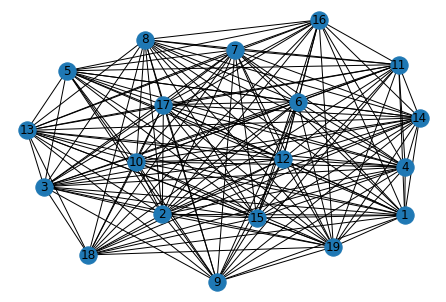

[1, 2, 3, 4, 7, 12, 14, 15, 17, 19, 13, 8, 16, 18]
[1, 2, 3, 4, 7, 12, 14, 15, 17, 19, 13, 8, 16, 11]
[1, 2, 3, 4, 7, 12, 14, 15, 17, 19, 13, 8, 10, 9, 11]
[1, 2, 3, 4, 7, 12, 14, 15, 17, 19, 13, 8, 10, 18]
[1, 2, 3, 4, 7, 12, 14, 15, 17, 19, 13, 5, 11, 16]
[1, 2, 3, 4, 7, 12, 14, 15, 17, 19, 13, 5, 11, 9, 10]
[1, 2, 3, 4, 7, 12, 14, 15, 17, 19, 6, 8, 16, 18]
[1, 2, 3, 4, 7, 12, 14, 15, 17, 19, 6, 8, 16, 11]
[1, 2, 3, 4, 7, 12, 14, 15, 17, 19, 6, 8, 10, 9, 11]
[1, 2, 3, 4, 7, 12, 14, 15, 17, 19, 6, 8, 10, 18]
[1, 2, 3, 4, 7, 12, 14, 15, 17, 19, 6, 5, 11, 16]
[1, 2, 3, 4, 7, 12, 14, 15, 17, 19, 6, 5, 11, 9, 10]


In [3]:
# Загружаем граф на основе списка ребер из таблицы
g = nx.from_pandas_edgelist(df=df, source='source_id' ,target='target_id', edge_attr='distance')

# Заранее расчитаем положение вершни на рисунке для использования в будущем (для единообразия)
nodes_pos=nx.spring_layout(g)
# Отображаем граф
nx.draw(g, with_labels = True, pos=nodes_pos)
plt.show()

# Находим все связанные компоненты в графе
#components = nx.connected_components(g)
#for  nodes  in components:
#    print(nodes)
    
# Находим все полносвязные компоненты в графе - клики (в нашем случае это и есть кластеры)
cliques = nx.find_cliques(g)
# Выводим вершины по каждой клике
for  nodes in cliques:
    print(nodes)

In [4]:
# Получаем ребра с весами (растояниями) выше "w"
w = 10
tr_edges = [(a,b) for a, b, attrs in g.edges(data=True) if attrs["distance"] >=w]
tr_edges

[(7, 15),
 (7, 9),
 (7, 5),
 (7, 3),
 (7, 2),
 (7, 16),
 (7, 14),
 (7, 6),
 (7, 12),
 (15, 15),
 (15, 8),
 (15, 12),
 (15, 6),
 (15, 13),
 (15, 3),
 (15, 4),
 (15, 19),
 (8, 16),
 (8, 9),
 (8, 14),
 (8, 2),
 (8, 13),
 (8, 19),
 (8, 11),
 (11, 19),
 (11, 17),
 (11, 16),
 (11, 4),
 (11, 3),
 (11, 12),
 (11, 13),
 (11, 14),
 (11, 2),
 (3, 12),
 (3, 5),
 (3, 2),
 (3, 17),
 (3, 10),
 (3, 13),
 (3, 4),
 (3, 6),
 (12, 1),
 (12, 16),
 (12, 14),
 (12, 12),
 (12, 18),
 (6, 16),
 (6, 2),
 (6, 18),
 (6, 1),
 (6, 9),
 (1, 5),
 (1, 19),
 (1, 9),
 (1, 4),
 (1, 16),
 (1, 1),
 (1, 18),
 (1, 14),
 (1, 10),
 (17, 17),
 (17, 5),
 (10, 13),
 (10, 2),
 (10, 5),
 (10, 10),
 (10, 14),
 (19, 13),
 (19, 4),
 (19, 9),
 (19, 5),
 (19, 18),
 (18, 14),
 (18, 2),
 (18, 18),
 (14, 4),
 (14, 13),
 (14, 14),
 (14, 16),
 (2, 4),
 (2, 16),
 (2, 9),
 (4, 9),
 (16, 5),
 (16, 13),
 (9, 5),
 (9, 9),
 (5, 13)]

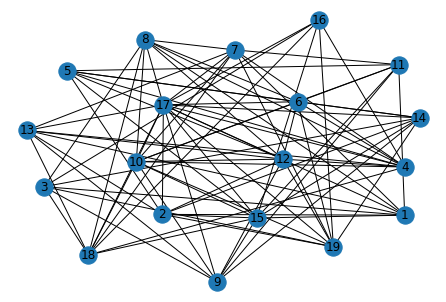

[11, 1, 7]
[11, 1, 15]
[11, 10, 9, 15]
[11, 10, 6]
[11, 10, 7]
[11, 5, 6]
[11, 5, 15]
[17, 1, 8, 7]
[17, 1, 2, 13]
[17, 1, 2, 15]
[17, 1, 7, 13]
[17, 2, 19, 12]
[17, 2, 19, 14]
[17, 2, 12, 13]
[17, 2, 14, 15]
[17, 10, 9, 12]
[17, 10, 9, 15]
[17, 10, 19, 12, 6]
[17, 10, 19, 7]
[17, 10, 4, 8, 18, 7]
[17, 10, 4, 8, 12, 6]
[17, 10, 15, 18]
[17, 13, 9, 12]
[17, 13, 4, 18, 7]
[17, 13, 4, 12]
[17, 14, 9, 15]
[17, 14, 6, 19]
[17, 16, 18, 4]
[17, 16, 18, 15]
[17, 16, 19]
[3, 8, 1]
[3, 8, 18]
[3, 9, 14]
[3, 14, 19]
[3, 16, 18]
[3, 16, 19]
[5, 2, 12]
[5, 2, 14, 15]
[5, 4, 12, 6]
[5, 6, 14]


In [5]:
# копируем наш базовый граф для удобства
new_g = g.copy()
# Удаляем зи копии полученные ребра с весом более "w"
new_g.remove_edges_from(tr_edges)
# Рисуем результат (полученный граф)
nx.draw(new_g, with_labels = True, pos=nodes_pos)
plt.show()

# Находим все полносвязанные компоненты в графе - клики (в нашем случае это и есть кластеры)
cliques = nx.find_cliques(new_g)
# Выводим вершины по каждой клике
for  nodes  in cliques:
    print(nodes)